### Проектная работа по модулю “Математика и статистика в Python”

#### Заданее 1.
Загрузить файл hr.csv

In [1]:
import pandas as pd
data=pd.read_csv('HR.csv', sep=',')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Заданее 2.
Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [2]:
from scipy import stats
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


#### Заданее 3.
Рассчитать и визуализировать корреляционную матрицу для переменных

In [4]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

#### Заданее 4.
Визуализировать несколько взаимосвязей между переменными

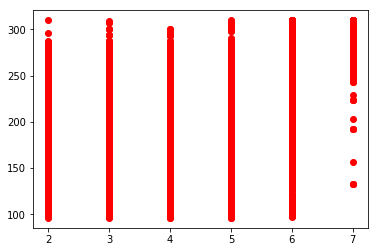

In [5]:
import matplotlib.pyplot as plt
plt.plot(data.number_project, data.average_montly_hours, 'ro')

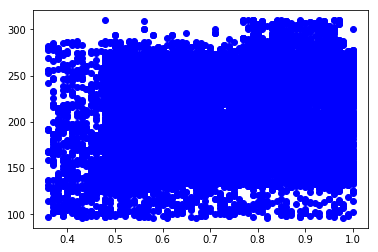

In [6]:
plt.plot(data.last_evaluation, data.average_montly_hours, 'bo')

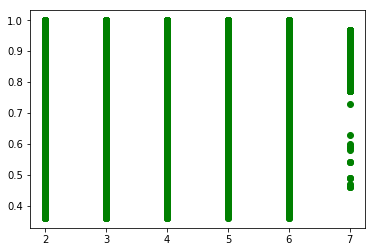

In [7]:
plt.plot(data.number_project, data.last_evaluation, 'go')

#### Заданее 5.
С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [8]:
from scipy import stats
stats.ttest_1samp(data.number_project, 4)

Ttest_1sampResult(statistic=-19.56860507344547, pvalue=3.208172919720802e-84)

In [9]:
less_then_4_prj = data[data.number_project <= 4 ]['average_montly_hours']
more_then_4_prj = data[data.number_project > 4 ]['average_montly_hours']
stats.ttest_ind(less_then_4_prj, more_then_4_prj)

Ttest_indResult(statistic=-35.59047937330369, pvalue=2.0512660588237807e-266)

In [10]:
stats.ttest_ind(data.number_project, data.last_evaluation)

Ttest_indResult(statistic=303.8042100031241, pvalue=0.0)

#### Заданее 6.
Рассчитать сколько работников работает в каждом департаменте

In [11]:
departments=pd.unique(data.sales)
idx=[]
print('%-18s%-18s' % ('DEPARTMENTS', 'NUMBER_OF_WORKERS' )) 
for x in departments:
    idx.append(data.sales[data.sales==x].count())
    print('%-18s%-18i' % (x, data.sales[data.sales==x].count() ))
departments=pd.Series(departments, index=idx).sort_index(ascending=False)

DEPARTMENTS       NUMBER_OF_WORKERS 
sales             4140              
accounting        767               
hr                739               
technical         2720              
support           2229              
management        630               
IT                1227              
product_mng       902               
marketing         858               
RandD             787               


#### Заданее 7.
Показать распределение сотрудников по зарплатам

/home/solovushka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/solovushka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/solovushka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys

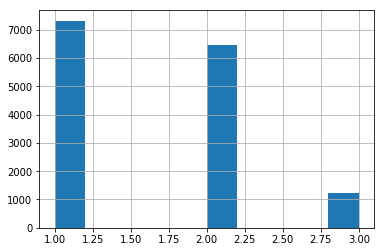

In [13]:
salaries=data.salary
salaries[salaries.isin(['low'])]=1
salaries[salaries.isin(['medium'])]=2
salaries[salaries.isin(['high'])]=3
salaries=pd.to_numeric(salaries, downcast='integer')
salaries.hist()

#### Заданее 8.
Показать распределение сотрудников по зарплатам совместно с департаментами

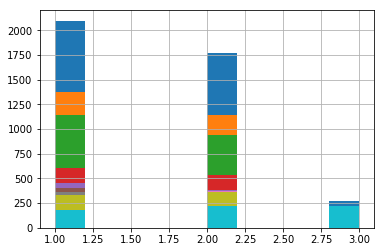

In [14]:
for x in departments:
    pd.to_numeric(data.salary[data.sales==x], downcast='integer').hist()

In [15]:
pd.Series(['a', 'b', 'c', 'd'], index=[3, 2, 1, np.nan])

NameError: name 'np' is not defined

#### Заданее 9.
Сколько сотрудников покинули компанию

In [16]:
data.left.sum()

3571

#### Заданее 10.
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

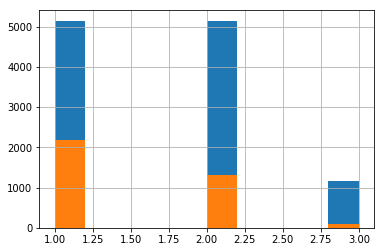

In [17]:
### Гипотеза1: сотрудники увольнялись из-за низких зарплат
for x in {1,0}:
    pd.to_numeric(data.salary[data.left==x], downcast='integer').hist()

In [18]:
### Сравним средние зарплаты для уволившихся и для оставшихся
print('Средняя ЗП уволившихся: ' + str(data.salary[data.left==1].mean()))
print('Средняя ЗП оставшихся: ' + str(data.salary[data.left==0].mean()))

Средняя ЗП уволившихся: 1.4147297675721087
Средняя ЗП оставшихся: 1.6509450472523626


In [19]:
### Гипотеза2: сотрудники увольнялись из-за большего количеста происшествий на работе
print('Среднее количество рабочих происшествий у уволившихся: ' + str(data.Work_accident[data.left==1].mean()))
print('Средняя количество рабочих происшествий у оставшихся: ' + str(data.Work_accident[data.left==0].mean()))

Среднее количество рабочих происшествий у уволившихся: 0.047325679081489776
Средняя количество рабочих происшествий у оставшихся: 0.17500875043752187


#### Заданее 11.
Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте